### ```AUTOR:``` MARTIN PEREZ MAGALLANES
### ```FECHA:``` 05/06/2021
### ```MATERIA:``` MATEMATICA 3

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import re

In [38]:
datos=['A','B','C','D','E','T']
grafo=[ ['A','B',5 ],
        ['A','D',6 ],
        ['B','C',5 ],
        ['B','E',6 ],
        ['B','G',7 ],
        ['C','G',2 ],
        ['D','F',5 ],
        ['D','G',9 ],
        ['E','G',7 ],
        ['F','G',9 ]]

In [39]:
class MIGRAFO:
    def __init__(self,Grf,datos):
        self.grafo=Grf
        self.grafo.add_weighted_edges_from(datos)
        self.position=nx.shell_layout(Grf)
    def diagramaGrafo(self,graf):
        """
            Esta funcion nos permitira graficar el Grafo y emitirlo.
        """
        nx.adjacency_matrix(graf)
        nx.incidence_matrix(graf)
        fig, ax = plt.subplots(figsize=(20,10))
        nx.draw_networkx_nodes(graf,self.position,node_color="pink",node_size=2000)
        nx.draw_networkx_labels(graf,self.position,font_size=20,font_family='sans-serif')

        nx.draw_networkx_edges(graf,self.position,width=2, arrowsize = 40,edge_color='white')
        labels=nx.get_edge_attributes(graf,'weight')
        nx.draw_networkx_edge_labels(graf,self.position,edge_labels=labels)

        plt.axis('off')
        fig.set_facecolor('black')
        plt.show()
    def emitoGraph(self):
        """
            Emitira el grafo original
        """
        self.diagramaGrafo(self.grafo)
    def emitoGraphDirigido(self):
        """
            Emitira el grafo pero Dirigido
        """
        dirigido=self.grafo.to_directed()
        self.diagramaGrafo(dirigido)


    

In [40]:
G=nx.Graph()
migrafo=MIGRAFO(G,grafo)

## ```Emitir los vecinos de ‘b’```

In [41]:
print('Vecinos:',list(migrafo.grafo.neighbors('B')))

Vecinos: ['A', 'C', 'E', 'G']


## ```Emitir cantidad de aristas de cada nodo```
## ```Convertir en diccionario la salida anterior```

In [42]:
print('Cantidad de aristas de cada nodo:',migrafo.grafo.degree())
print('En modo Diccionario:',dict(migrafo.grafo.degree()),sep='\n')

Cantidad de aristas de cada nodo: [('A', 2), ('B', 4), ('D', 3), ('C', 2), ('E', 2), ('G', 5), ('F', 2)]
En modo Diccionario:
{'A': 2, 'B': 4, 'D': 3, 'C': 2, 'E': 2, 'G': 5, 'F': 2}


## ```Crear la matriz de adyacencia y emitirla```

In [43]:
matrizAdyacencia = nx.adjacency_matrix(migrafo.grafo)
print('Matriz de adyacencia:',matrizAdyacencia.todense(),sep='\n\n') 

Matriz de adyacencia:

[[0 5 6 0 0 0 0]
 [5 0 0 5 6 7 0]
 [6 0 0 0 0 9 5]
 [0 5 0 0 0 2 0]
 [0 6 0 0 0 7 0]
 [0 7 9 2 7 0 9]
 [0 0 5 0 0 9 0]]


## ```Crear la matriz de incidencia y emitirla```

In [44]:
matrizIncidencia =  nx.incidence_matrix(migrafo.grafo)
print('Matriz de incidencia:',matrizIncidencia.todense(),sep='\n\n')

Matriz de incidencia:

[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]]


## ```q)Emitir la ruta ponderada más corta entre ‘a’ y ‘t’ usando el algoritmo de Dijkstra```
## ```r)Emitir la longitud de la ruta ponderada entre ‘a’ y ‘t’```

In [45]:
print("Ruta mas corta usando el algoritmo de Dijkstra entre:",nx.algorithms.dijkstra_path(migrafo.grafo, 'A', 'G'))
print("Longitud de Ruta ponderada más corta entre:",nx.dijkstra_path_length(migrafo.grafo,'A','G'))

Ruta mas corta usando el algoritmo de Dijkstra entre: ['A', 'B', 'G']
Longitud de Ruta ponderada más corta entre: 12


## ```s)Emitir la longitud de la ruta desde el nodo ‘c‘```

In [46]:
print("Longitud de Ruta ponderada más corta desde el nodo:", nx.single_source_dijkstra_path_length(migrafo.grafo,'C'),sep='\n')

Longitud de Ruta ponderada más corta desde el nodo:
{'C': 0, 'G': 2, 'B': 5, 'E': 9, 'A': 10, 'D': 11, 'F': 11}


## ```t)Emitir el radio del grafo```
## ```u)Emitir el diámetro del grafo```
## ```v)Emitir la excentricidad ```
## ```w)Emitir el centro del grafo```
## ```x)Emitir la periferia del grafo```
## ```y)Emitir la densidad.```

In [47]:
print("Radio:",nx.radius(migrafo.grafo))
print("Diámetro:", nx.diameter(migrafo.grafo))
print("Excentricidad:", nx.eccentricity(migrafo.grafo))
print("Centro:", nx.center(migrafo.grafo))
print("Periferia:", nx.periphery(migrafo.grafo))
print("Densidad:", nx.density(migrafo.grafo))

Radio: 2
Diámetro: 2
Excentricidad: {'A': 2, 'B': 2, 'D': 2, 'C': 2, 'E': 2, 'G': 2, 'F': 2}
Centro: ['A', 'B', 'D', 'C', 'E', 'G', 'F']
Periferia: ['A', 'B', 'D', 'C', 'E', 'G', 'F']
Densidad: 0.47619047619047616


## ```z)Dibujar el grafo y emitir con matplotlib.pyplot```

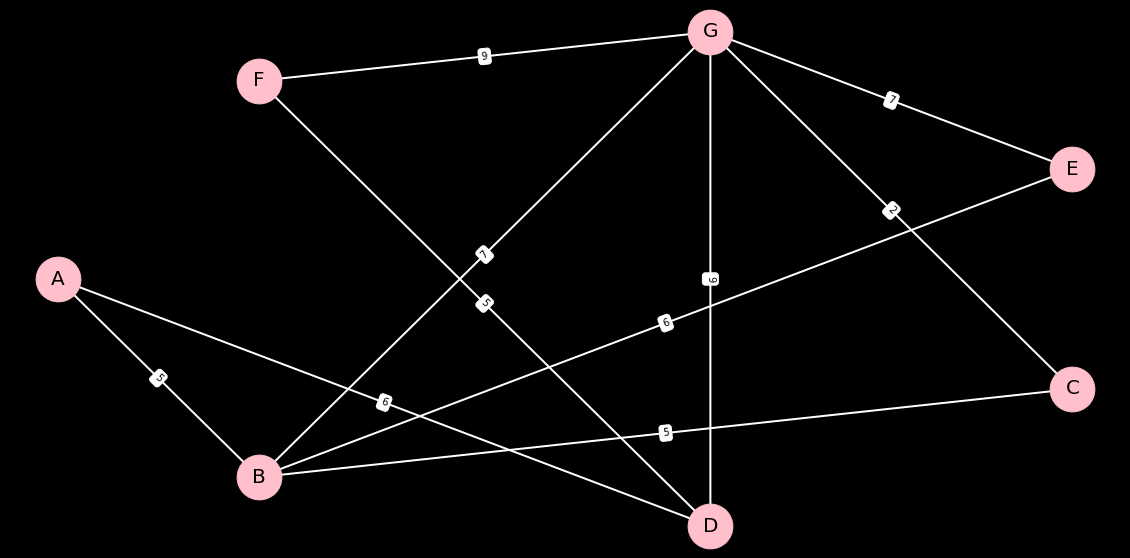

In [48]:
migrafo.emitoGraph()


## ```aa)Convertir en grafo dirigido. Dibujarel nuevo grafoy emitir con matplotlib.pyplot```

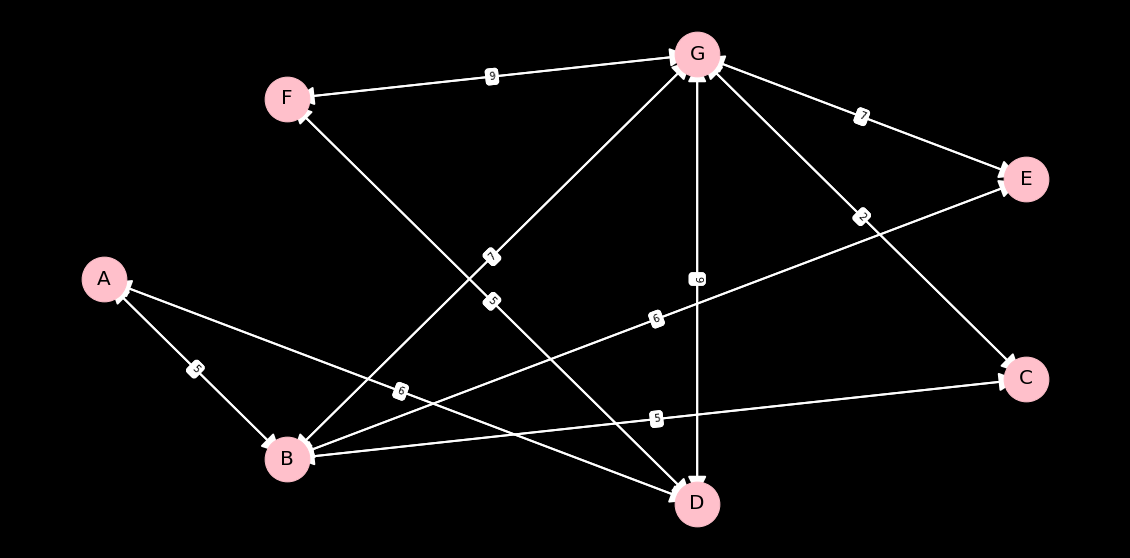

In [49]:
migrafo.emitoGraphDirigido()

## ```3. Las siguientes líneas de texto fueron extraídas de un archivo conmuchas entradas, representan: ip, usuario, fecha y hora y petición. Encuentra la expresión regular para extraer y emitir la cadena entre " ". Desarrollael código correspondiente.(Valor 2puntos)```

In [50]:
texto = """
98.140.180.244 - harber4797 [21/Jun/2019:16:01:53 -0700] "POST /seize/b2b/synergistic HTTP/2.0" 203 9396
229.231.201.185 - - [21/Jun/2019:16:01:35 -0700] "HEAD /supply-chains/brand/strategic HTTP/1.1" 405 28109
197.150.196.204 - thiel4558 [21/Jun/2019:16:01:05 -0700] "PATCH /compelling HTTP/2.0" 500 14180
"""
regex= r'"(.+)"'
listaDeValores = re.findall(regex, texto) 
print(listaDeValores)

['POST /seize/b2b/synergistic HTTP/2.0', 'HEAD /supply-chains/brand/strategic HTTP/1.1', 'PATCH /compelling HTTP/2.0']
